<a href="https://colab.research.google.com/github/LeToanPhat/AI/blob/main/T7_mtcar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:


data = pd.read_csv('mtcars.csv')

In [5]:

data.head()
data.shape

(32, 5)

In [6]:
corerlattion = data.corr()
print(corerlattion)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


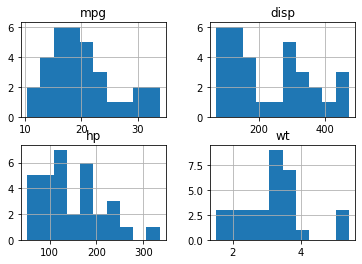

In [7]:
data.hist()
plt.show()

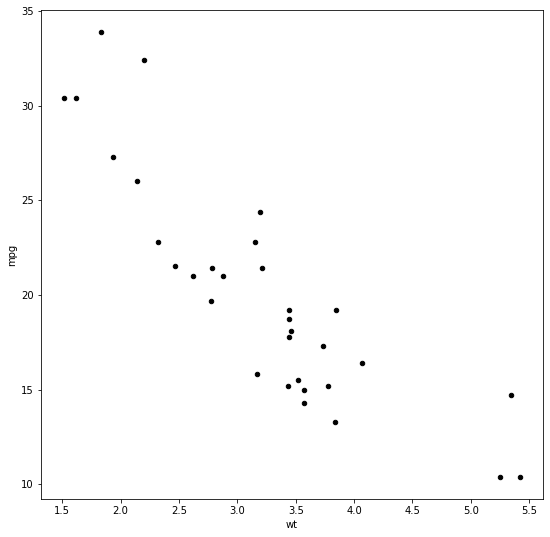

In [9]:
x = data.drop(data.columns[[0,2]], axis = 1)
data.plot(kind = 'scatter', x = 'wt', y ='mpg', figsize = (9,9), color = 'black');

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit( X = pd.DataFrame(data['wt']),y=pd.DataFrame(data['mpg']))
print(model.intercept_)
print(model.coef_)

[37.28512617]
[[-5.34447157]]


In [21]:
model.score( X = pd.DataFrame(data['wt']), y = data['mpg'])
y_pred = model.predict(pd.DataFrame(data['wt']))
residival = data['mpg'] - y_pred
residival.describe()
data.plot(kind = 'scatter',x='wt',y='mpg',figsize = (9,9),color = 'black')
plt.plot(data['wt'],y_pred,color = 'blue')

ValueError: ignored

In [19]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'],data['wt']**2]).T
model.fit( X, y = data['mpg'])
print('Intercept của mô hình bậc 2')
print(model.intercept_)
print('Độ chính xác của mô hình')
print(model.score(X = pd.DataFrame([data['wt'],data['wt']**2]).T,y = data['mpg']))

Intercept của mô hình bậc 2
49.93081094945181
Độ chính xác của mô hình
0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


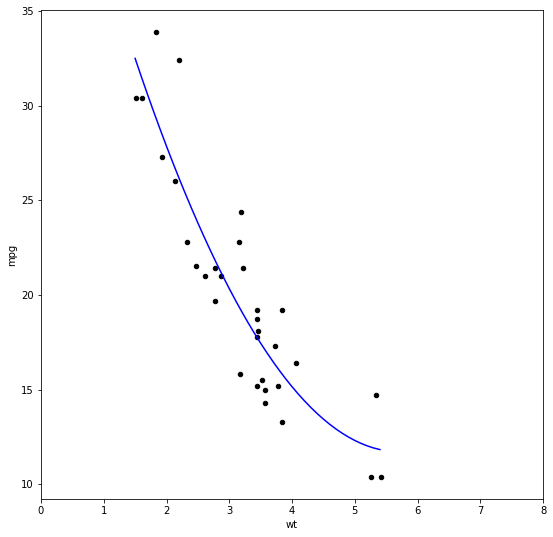

In [20]:
range = np.arange(1.5,5.5,0.1)
pridictor = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X = pridictor)
data.plot(kind = 'scatter',x='wt',y='mpg',figsize = (9,9),color = 'black',xlim = (0,8))
plt.plot(range,y_pred,color = 'blue')